# Inspect Caladrius Dataset

In [1]:
DATASET_NAME = "Sint-Maarten-2017"

In [2]:
import os
import seaborn as sns
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%load_ext nb_black
%matplotlib inline

FIGURE_SIZE = (20, 10)
sns.set(rc={"figure.figsize": FIGURE_SIZE})

<IPython.core.display.Javascript object>

In [3]:
DATA_FOLDER = "../../data"
TRAIN_FOLDER = "train"
VALIDATION_FOLDER = "validation"
TEST_FOLDER = "test"
INFERENCE_FOLDER = "inference"
LABELS_FILE = "labels.txt"
BEFORE_FOLDER = "before"
AFTER_FOLDER = "after"
CLASS_NAMES = ["low", "medium", "high"]

<IPython.core.display.Javascript object>

In [4]:
dataset_path = os.path.join(DATA_FOLDER, DATASET_NAME)
train_path = os.path.join(dataset_path, TRAIN_FOLDER)
validation_path = os.path.join(dataset_path, VALIDATION_FOLDER)
test_path = os.path.join(dataset_path, TEST_FOLDER)
inference_path = os.path.join(dataset_path, INFERENCE_FOLDER)

<IPython.core.display.Javascript object>

In [5]:
DAMAGE_THRESHOLD_A = 0.3
DAMAGE_THRESHOLD_B = 0.7

<IPython.core.display.Javascript object>

In [6]:
def read_damage_labels(labels_file_path):
    input_filename_damage_label = {}
    with open(labels_file_path) as labels_file:
        labels_file_contents = labels_file.read()
        labels_file_lines = labels_file_contents.split("\n")
        for labels_file_line in labels_file_lines:
            if len(labels_file_line) > 1:
                input_filename, damage_label = labels_file_line.split(" ")
                input_filename_damage_label[input_filename] = float(damage_label)
    return input_filename_damage_label


def class_damage_labels(damage_labels):
    class_labels = {
        "low": {},
        "medium": {},
        "high": {},
    }
    for input_filename, damage_label in damage_labels.items():
        if damage_label <= DAMAGE_THRESHOLD_A:
            class_name = "low"
        elif damage_label > DAMAGE_THRESHOLD_A and damage_label < DAMAGE_THRESHOLD_B:
            class_name = "medium"
        elif damage_label >= DAMAGE_THRESHOLD_B:
            class_name = "high"
        class_labels[class_name][input_filename] = damage_label
    return class_labels


def view_image(input_filename, split_path):
    before_image_path = os.path.join(split_path, "before", input_filename)
    after_image_path = os.path.join(split_path, "after", input_filename)
    return mpimg.imread(before_image_path), mpimg.imread(after_image_path)


def view_images(split, number_of_images=3, split_path=test_path):
    figure = plt.figure(figsize=FIGURE_SIZE)
    r = len(CLASS_NAMES)
    c = 2 * number_of_images
    class_axes = {
        'low': [plt.subplot(r, c, 1), plt.subplot(r, c, 2), plt.subplot(r, c, 3), plt.subplot(r, c, 4), plt.subplot(r, c, 5), plt.subplot(r, c, 6)],
        'medium': [plt.subplot(r, c, 7), plt.subplot(r, c, 8), plt.subplot(r, c, 9), plt.subplot(r, c, 10), plt.subplot(r, c, 11), plt.subplot(r, c, 12)],
        'high': [plt.subplot(r, c, 13), plt.subplot(r, c, 14), plt.subplot(r, c, 15), plt.subplot(r, c, 16), plt.subplot(r, c, 17), plt.subplot(r, c, 18)],
    }
    for class_index, class_name in enumerate(CLASS_NAMES):
        input_filenames = list(split[class_name].keys())
        random.shuffle(input_filenames)
        random_n_filenames = input_filenames[:number_of_images]
        for input_filename_index, random_input_filename in enumerate(random_n_filenames):
            before_image, after_image = view_image(random_input_filename, split_path)
            class_axes[class_name][input_filename_index * 2].imshow(before_image)
            class_axes[class_name][input_filename_index * 2].set_title("Before Event\n{} - {}".format(random_input_filename, class_name))
            class_axes[class_name][input_filename_index * 2].grid(False)
            class_axes[class_name][input_filename_index * 2 + 1].imshow(after_image)
            class_axes[class_name][input_filename_index * 2 + 1].set_title("After Event\n{} - {}".format(random_input_filename, class_name))
            class_axes[class_name][input_filename_index * 2 + 1].grid(False)
    figure.tight_layout()
    plt.show()


def inspect_split(split_name="Test Set", split_folder=TEST_FOLDER, split_path=test_path):
    split_labels_file_path = os.path.join(split_path, LABELS_FILE)
    split_labels = read_damage_labels(split_labels_file_path)
    split_class_damage_labels = class_damage_labels(split_labels)
    print("{}".format(split_name))
    print("")
    print("{:04d} datapoints in total.".format(len(split_labels)))
    for class_name in CLASS_NAMES:
        print("{:04d} ({:.2f}%) datapoints in class '{}'.".format(len(split_class_damage_labels[class_name]), 100 * len(split_class_damage_labels[class_name])/len(split_labels), class_name ))

    label_distribution = sns.distplot(list(split_labels.values()), axlabel="Damage Label", label=split_name).set_title("{} Label Distribution".format(split_name))
    
    view_images(split_class_damage_labels, split_path=split_path)

    return split_class_damage_labels
    


<IPython.core.display.Javascript object>

Train Set

2593 datapoints in total.
1111 (42.85%) datapoints in class 'low'.
0954 (36.79%) datapoints in class 'medium'.
0528 (20.36%) datapoints in class 'high'.


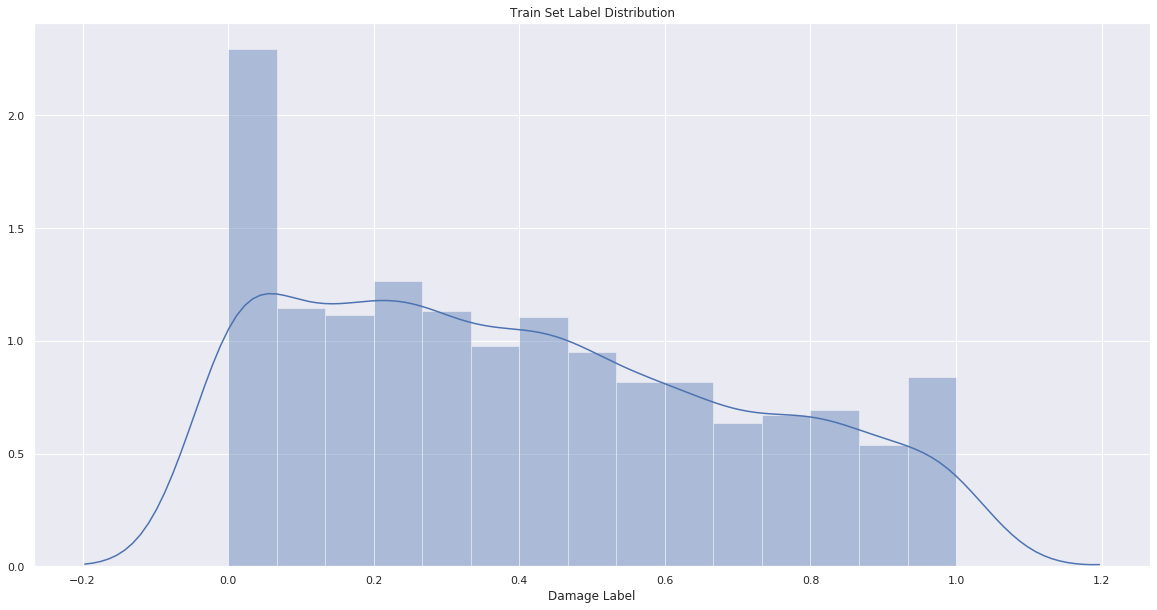

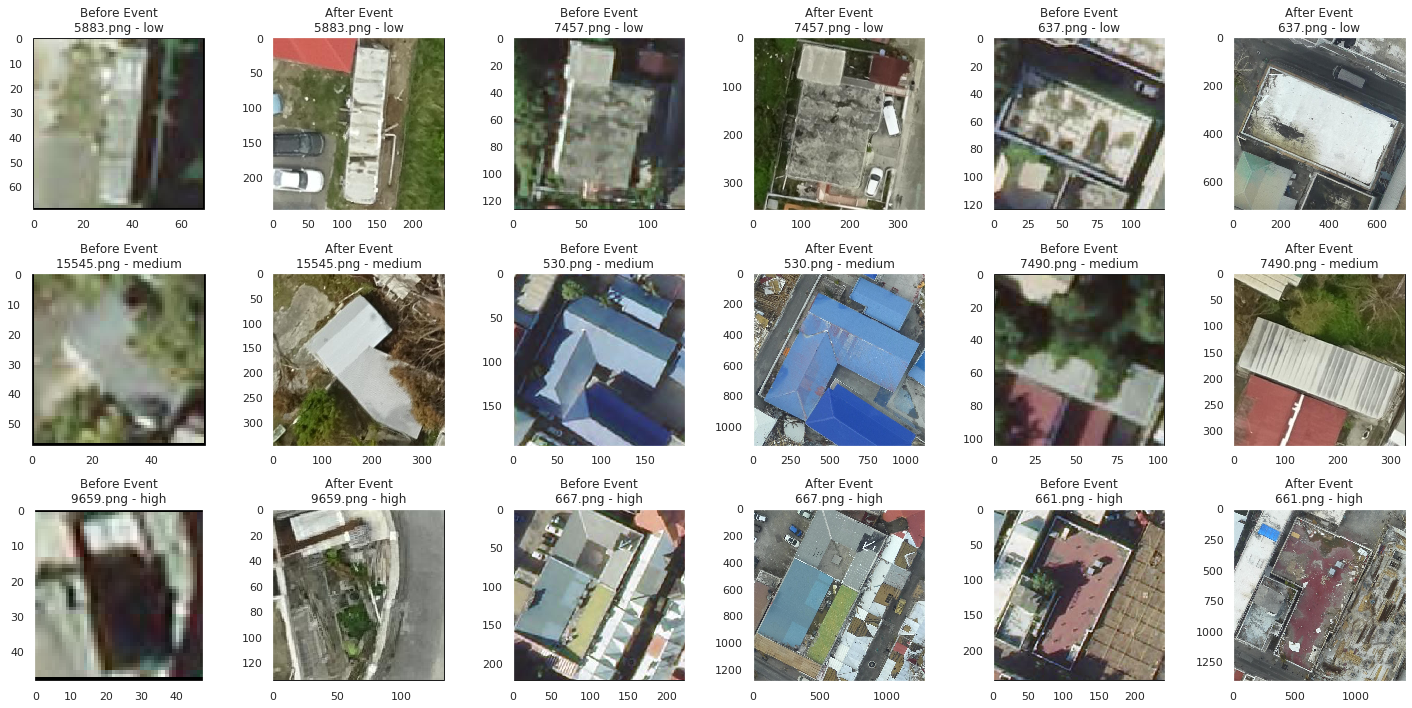

<IPython.core.display.Javascript object>

In [7]:
train_split = inspect_split(
    split_name="Train Set", split_folder=TRAIN_FOLDER, split_path=train_path
)

Validation Set

0324 datapoints in total.
0137 (42.28%) datapoints in class 'low'.
0117 (36.11%) datapoints in class 'medium'.
0070 (21.60%) datapoints in class 'high'.


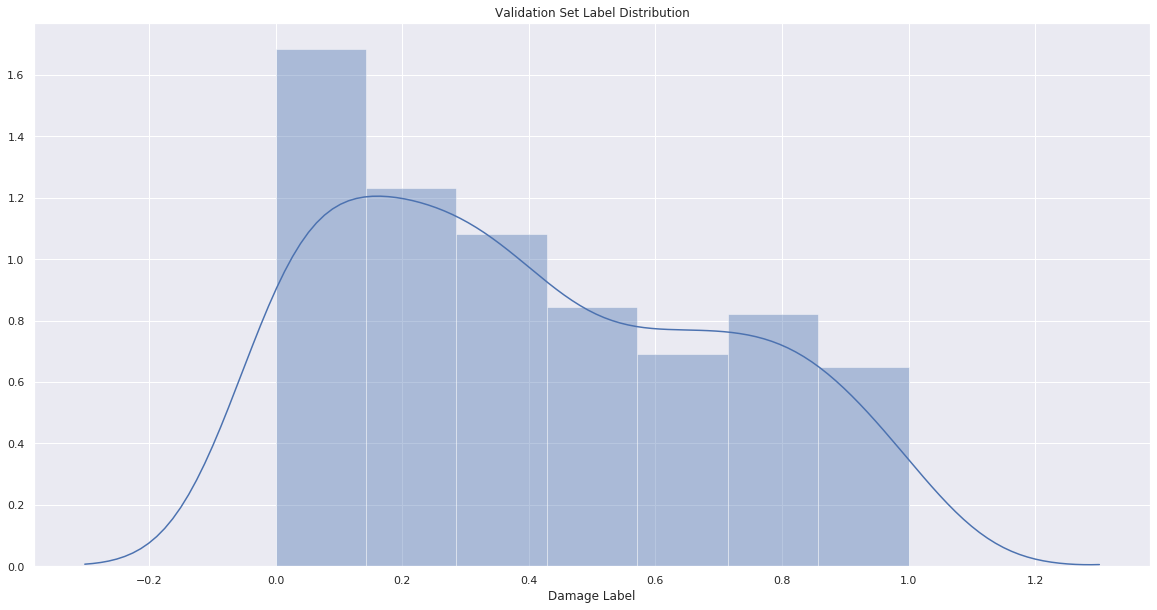

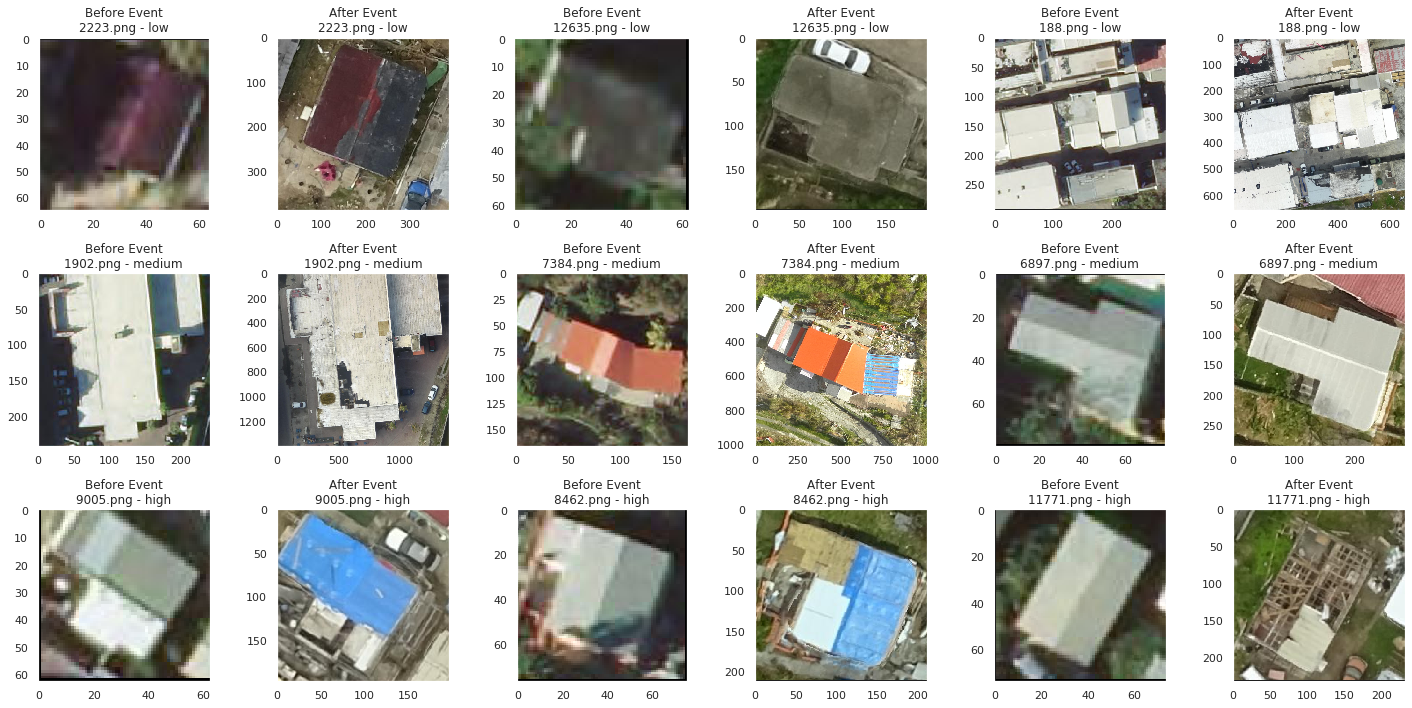

<IPython.core.display.Javascript object>

In [8]:
validation_split = inspect_split(
    split_name="Validation Set",
    split_folder=VALIDATION_FOLDER,
    split_path=validation_path,
)

Test Set

0325 datapoints in total.
0132 (40.62%) datapoints in class 'low'.
0130 (40.00%) datapoints in class 'medium'.
0063 (19.38%) datapoints in class 'high'.


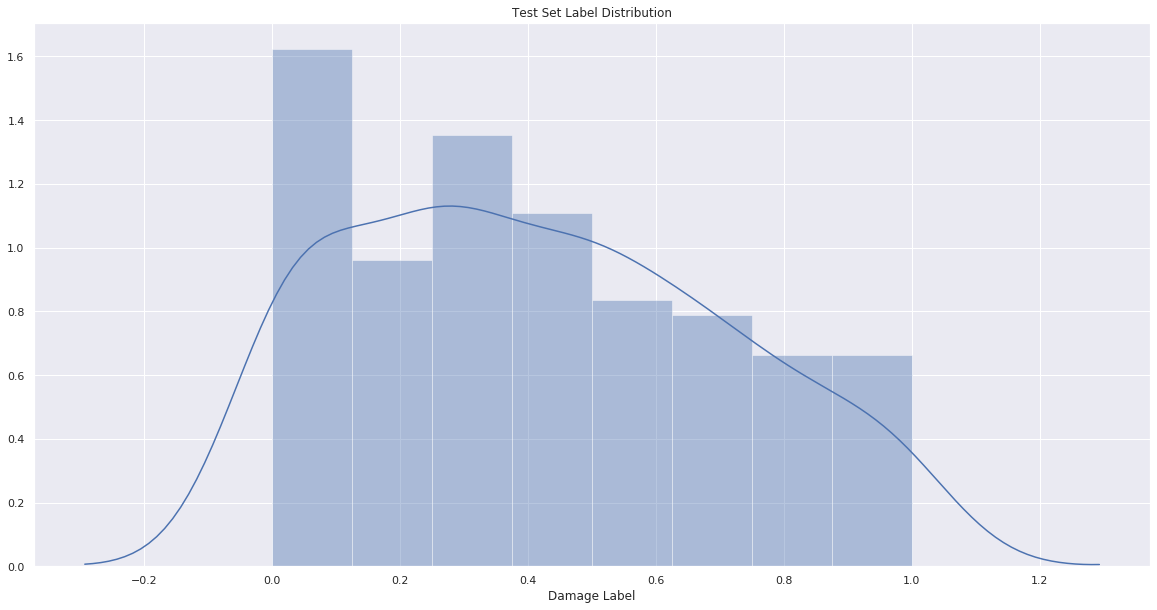

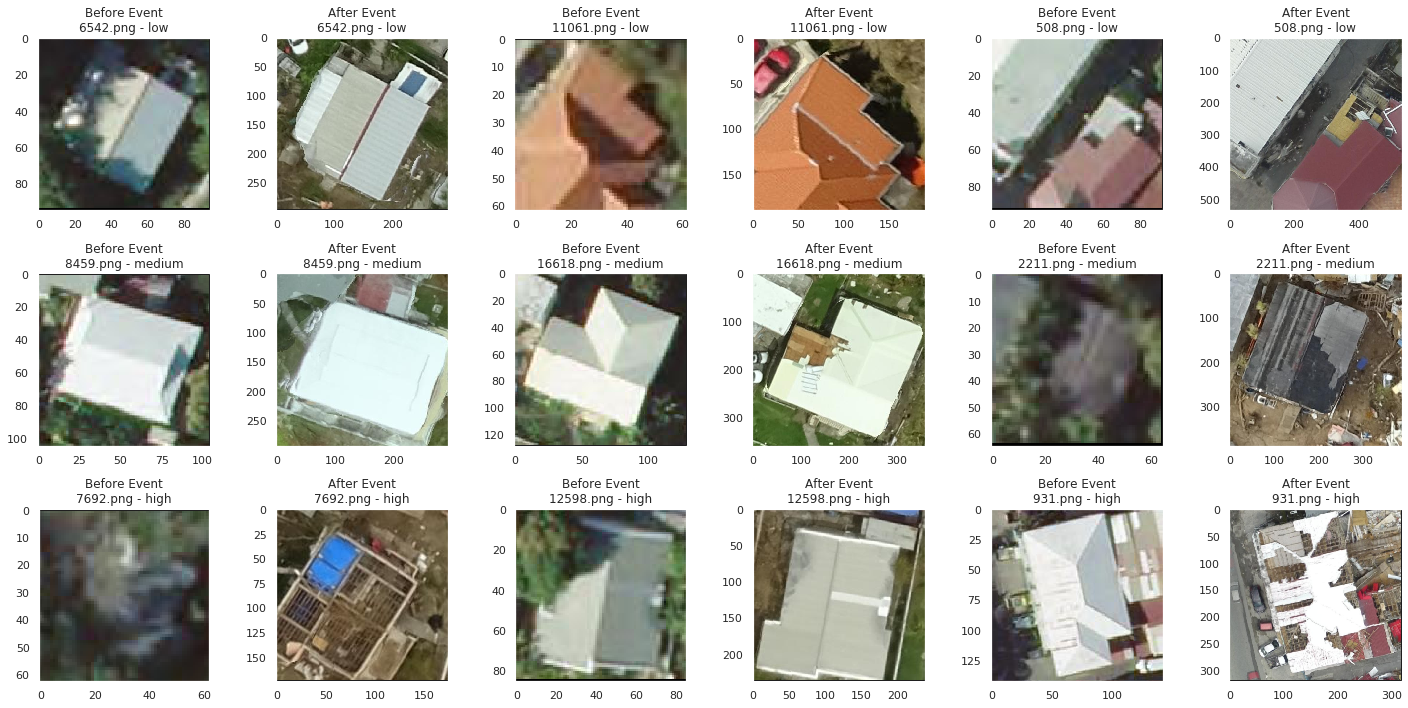

<IPython.core.display.Javascript object>

In [9]:
test_split = inspect_split(
    split_name="Test Set", split_folder=TEST_FOLDER, split_path=test_path
)